## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

if not os.path.isdir('models'): 
    os.mkdir('models')   

In [2]:
import tensorflow as tf
from keras.models import Sequential  #Sequential Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation  #Different layers of CNN
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [3]:
pip install emnist

In [ ]:
#from emnist import list_datasets

In [ ]:
#list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples 
X_train,y_train = extract_training_samples('byclass')

In [5]:
from emnist import extract_test_samples
X_test,y_test  = extract_test_samples('byclass')

In [ ]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (697932, 28, 28)
y_train shape:  (697932,)
X_test shape:  (116323, 28, 28)
y_test shape:  (116323,)


In [ ]:
#In Training Set there are 6,97,932 images of 28 by 28 pixels
#In test Set there are 1,16,323 images of 28 by 28 pixels

## Visualization

	  Label : 2


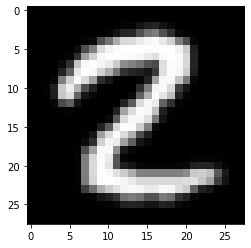

In [ ]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

#by adding ; at the end you don't get that matplotlib line....<matplotlib.image.AxesImage at 0x7fa9f8b04a20>

	  Label : 24


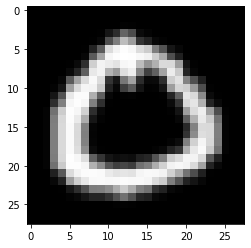

In [ ]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

			TABLE



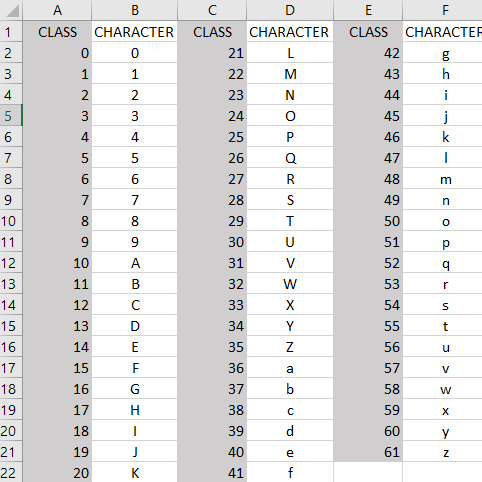

In [ ]:
print("\t\t\tTABLE\n")
from IPython.display import Image
Image('/content/Images/Table.png')

In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

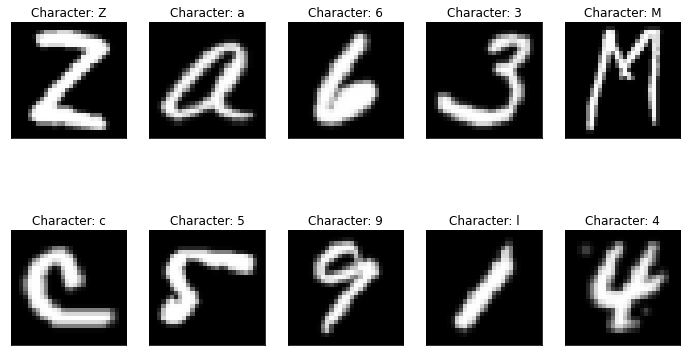

In [ ]:
#Checking Training Examples
fig = plt.figure(figsize=(12,7))
for i in range(10):
  plt.subplot( 2, 5 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_train[i], cmap='gray')  # prints image
  plt.yticks([])  #no x and y ticks
  plt.xticks([])
  index = y_train[i]
  plt.title("Character: " + str(classes[index]))      

## Reshaping and One Hot Encoding

In [6]:
#We need to reshape our 3D array to 4D array so it can be used with keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (697932, 28, 28, 1)
X_test shape:  (116323, 28, 28, 1)


In [8]:
X_train = X_train/255  #normalize inputs from 0-255 to 0-1
X_test = X_test/255

In [9]:
from keras.utils import to_categorical
#Keras expects "one hot" encoding in multiclass problems for the labels.

print("Shape of y_train:",y_train.shape)
y_train = to_categorical(y_train)   
print("New Shape of y_train:",y_train.shape)
print("\n")
print("Shape of y_test:",y_test.shape)
y_test = to_categorical(y_test)  
print("New Shape of y_test:",y_test.shape)

Shape of y_train: (697932,)
New Shape of y_train: (697932, 62)


Shape of y_test: (116323,)
New Shape of y_test: (116323, 62)


## MODEL 1

In [ ]:
# Structure of Model

# Input Vector :  784 pixels (28x28)
# Convolutional Layer 1  :  128 filters
# Convolutional Layer 2  :  256 filters
# Output Layer :  62 classes

In [ ]:
def my_model_2():  #3 Layer CNN
 #Input is 28x28 pixel images with 1 channel -> (28, 28, 1)
  model = Sequential()
  
  # ------ Convolutional Layers -------   ( Feature Extraction )
  
  # 1st Convolutional layer
  model.add(Conv2D(128, (3,3), input_shape = (28,28,1),activation='relu'))  # adds 128 filters with 3x3 window size/kernel size            
  model.add(MaxPooling2D(pool_size=(2,2)))
 
  # 2nd Convolutional layer
  model.add(Conv2D(256, (5,5),activation='relu'))  # adds 256 filters with 3x3 kernel size..Activation function is relu
  model.add(MaxPooling2D(pool_size=(2,2)))  #Performs pooling to reduce dimensionality size
  

  #  ------ Fully Connected Layer ------   ( Classification )

  # 3rd layer (Output Layer)
  model.add(Flatten())  # Flattening the matrix into 1D array and feed it into Dense layer.
  model.add(Dense(62,activation='softmax'))
  #ouput layer has 62 neurons because there are 62 classes
  #softmax function is used for multi-class classification

  return model
 


In [ ]:
model1 = my_model_2()
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 256)         819456    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 62)                254014    
Total params: 1,074,750
Trainable params: 1,074,750
Non-trainable params: 0
____________________________________________

In [ ]:
model1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [ ]:
# Fit model on training data
history = model1.fit(X_train, y_train,
                  batch_size = 128,
                  epochs = 30,
                  validation_data=(X_test,y_test), 
                  #our model dosen't see this validation data...so it does not get trained on it...
                  #it's only used for tuning hyperparameters...
                  verbose=1,
                  callbacks=[
                 EarlyStopping(monitor='val_accuracy', patience=7)
                # ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', #Models stored in file
                                                 #   save_best_only=True,
                                                  # save_weights_only=False, 
                                                   #monitor='val_accuracy')]
                  ]
             )

Train on 697932 samples, validate on 116323 samples
Epoch 1/30
697932/697932 [==============================] - 56s 80us/step - loss: 0.4704 - accuracy: 0.8386 - val_loss: 0.3859 - val_accuracy: 0.8592
Epoch 2/30
697932/697932 [==============================] - 57s 81us/step - loss: 0.3689 - accuracy: 0.8647 - val_loss: 0.3707 - val_accuracy: 0.8656
Epoch 3/30
697932/697932 [==============================] - 57s 82us/step - loss: 0.3421 - accuracy: 0.8722 - val_loss: 0.3619 - val_accuracy: 0.8666
Epoch 4/30
697932/697932 [==============================] - 56s 81us/step - loss: 0.3221 - accuracy: 0.8782 - val_loss: 0.3661 - val_accuracy: 0.8632
Epoch 5/30
697932/697932 [==============================] - 55s 79us/step - loss: 0.3047 - accuracy: 0.8835 - val_loss: 0.3655 - val_accuracy: 0.8659
Epoch 6/30
697932/697932 [==============================] - 55s 79us/step - loss: 0.2891 - accuracy: 0.8886 - val_loss: 0.3801 - val_accuracy: 0.8628
Epoch 7/30
697932/697932 [======================

In [ ]:
# Evaluate model on test data
loss, accuracy = model1.evaluate(X_test, y_test, verbose=1)
print ('Test loss :', loss )
print ('Test accuracy :', accuracy )

116323/116323 [==============================] - 9s 76us/step
Test loss : 0.43962223137614725
Test accuracy : 0.8586350083351135


In [ ]:
loss1, accuracy1 = model1.evaluate(X_train, y_train, verbose=1)
print ('Train loss :', loss1 )
print ('Train accuracy :', accuracy1 )

697932/697932 [==============================] - 52s 75us/step
Train loss : 0.21211995686434634
Train accuracy : 0.91724693775177


Text(0, 0.5, 'Accuracy')

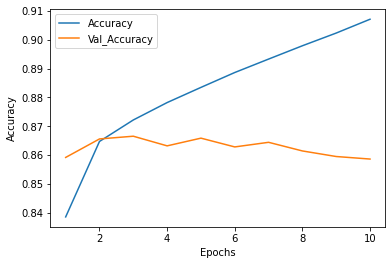

In [ ]:
import seaborn as sns
s = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+s),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

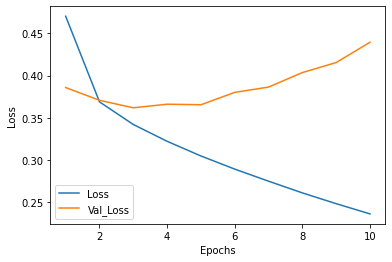

In [ ]:
s = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['loss'], label='Loss')
sns.lineplot(x = range(1,1+s),y = history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## MODEL 2

In [ ]:
#  Model Structure
# Input vector (28,28,1)
# 1 hidden layer 128 units
# 1 output Layer with 62 classes

In [ ]:
def my_model_1(inp_shape,output_size):  # 3 layer CNN
  model = Sequential() 
  #Creating Sequential Model

 #Layer 1
  model.add(Conv2D(28, kernel_size=(3,3), input_shape=inp_shape))#This layer is used to extract features from image
  model.add(MaxPooling2D(pool_size=(2, 2)))  # downsampling operation 
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers into 1D array


  #Layer 2
  model.add(Dense(128, activation=tf.nn.relu))  #Dense layer implies each neuron connected to all other neurons
  #There are 128 neurons here and activation function is relu
  model.add(Dropout(0.2))  #Dropout---> 20% neurons will be dropped....used to avoid overfitting

  #layer 3
  model.add(Dense(output_size,activation=tf.nn.softmax))
  #ouput layer has 62 neurons because there are 62 classes in dataset
  #softmax function is used for multi-class classification
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model = my_model_1((28,28,1),62)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                7998      
Total params: 614,102
Trainable params: 614,102
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(X_train,y_train, epochs=8)

Epoch 1/8
697932/697932 [==============================] - 135s 193us/step - loss: 0.6536 - accuracy: 0.7902
Epoch 2/8
697932/697932 [==============================] - 129s 184us/step - loss: 0.5182 - accuracy: 0.8239
Epoch 3/8
697932/697932 [==============================] - 129s 185us/step - loss: 0.4934 - accuracy: 0.8309
Epoch 4/8
697932/697932 [==============================] - 129s 184us/step - loss: 0.4790 - accuracy: 0.8345
Epoch 5/8
697932/697932 [==============================] - 130s 186us/step - loss: 0.4704 - accuracy: 0.8367
Epoch 6/8
697932/697932 [==============================] - 129s 185us/step - loss: 0.4637 - accuracy: 0.8382
Epoch 7/8
697932/697932 [==============================] - 130s 186us/step - loss: 0.4587 - accuracy: 0.8395
Epoch 8/8
697932/697932 [==============================] - 129s 185us/step - loss: 0.4548 - accuracy: 0.8407


In [ ]:
model.evaluate(X_test, y_test)

116323/116323 [==============================] - 10s 88us/step


[0.4404184792265762, 0.8479492664337158]

Predicted Label :  1


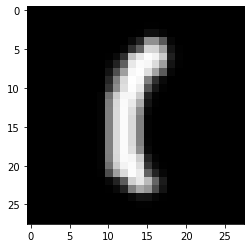

In [ ]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
print("Predicted Label : ",predictions.argmax())

## MODEL 3  ( Good Results )


In [ ]:
# ----- Model Stucture -----

# Input - (28x28) pixel image
# 1st Convolutional Layer - 128 filters
# 2nd Convolutional Layer - 256 filters
# 3rd Output Layer - 62 classes

In [20]:
def my_model_3():  
# Input: 28x28 images with 1 channel -> (28, 28, 1)
  model = Sequential()
  
  # ----- Feature Extraction ----- ( Convolutional layers )

  # 1st Convolutional layer
  model.add(Conv2D(128, (3,3),activation='relu', input_shape = (28,28,1))) # adds 128 neurons with 3x3 window size/kernel size 
  model.add(BatchNormalization()) 
  model.add(MaxPooling2D(pool_size=(2,2)))

  # 2nd Convolutional layer
  model.add(Conv2D(256, (5,5),activation='relu'))      # 256 filters with 3x3 kernel size..
  model.add(BatchNormalization())                  #Activation function is relu
  model.add(MaxPooling2D(pool_size=(2,2)))  #Perform pooling to reduce dimensionality size

 
  # ----- Classification -----  ( Fully Connected Layer )

  # 3rd layer(Output Layer)
  model.add(Flatten())  # Flattening the matrix into 1D array and feed it into a fully connected layer(Dense layer).

  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(62,activation='softmax'))
  #ouput layer has 62 neurons because there are 62 classes
  #softmax function is used for multi-class classification

  return model

In [21]:
model2 = my_model_3()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 256)         819456    
_________________________________________________________________
batch_normalization_8 (Batch (None, 9, 9, 256)         1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [22]:
model2.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [23]:
# Fit model on training data
history = model2.fit(X_train, y_train,
                  batch_size = 128,
                  epochs = 30,
                  validation_data=(X_test,y_test), 
                  #our model dosen't see this validation data...so it does not get trained on it...
                  #it's only used for tuning hyperparameters...
                  verbose=1,
                  callbacks=[
                 EarlyStopping(monitor='val_accuracy', patience=3)
              #   ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', #Models stored in file
                                                  #  save_best_only=True,
                                                   #save_weights_only=False, 
                                                   #monitor='val_accuracy')]
                  ]
             )

Train on 697932 samples, validate on 116323 samples
Epoch 1/30
697932/697932 [==============================] - 257s 368us/step - loss: 0.4761 - accuracy: 0.8377 - val_loss: 0.3885 - val_accuracy: 0.8578
Epoch 2/30
697932/697932 [==============================] - 256s 367us/step - loss: 0.3843 - accuracy: 0.8607 - val_loss: 0.3720 - val_accuracy: 0.8633
Epoch 3/30
697932/697932 [==============================] - 257s 368us/step - loss: 0.3611 - accuracy: 0.8666 - val_loss: 0.3494 - val_accuracy: 0.8703
Epoch 4/30
697932/697932 [==============================] - 256s 367us/step - loss: 0.3453 - accuracy: 0.8711 - val_loss: 0.3426 - val_accuracy: 0.8729
Epoch 5/30
697932/697932 [==============================] - 257s 369us/step - loss: 0.3335 - accuracy: 0.8745 - val_loss: 0.3440 - val_accuracy: 0.8725
Epoch 6/30
697932/697932 [==============================] - 256s 367us/step - loss: 0.3224 - accuracy: 0.8776 - val_loss: 0.3416 - val_accuracy: 0.8734
Epoch 7/30
697932/697932 [==========

### **Evaluate on Model**

In [24]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print ('Test loss :', loss )
print ('Test accuracy :', accuracy )

Test loss : 0.34752235144337557
Test accuracy : 0.8725617527961731


In [25]:
loss1, accuracy1 = model2.evaluate(X_train, y_train, verbose=0)
print ('Train loss :', loss1 )
print ('Train accuracy :', accuracy1 )

Train loss : 0.25619218300250834
Train accuracy : 0.8991062045097351


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Accuracy')

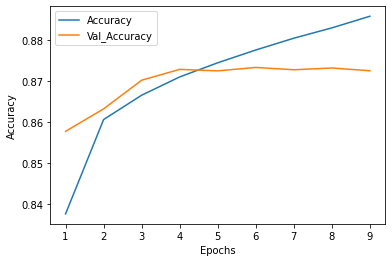

In [26]:
import seaborn as sns
s = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+s),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

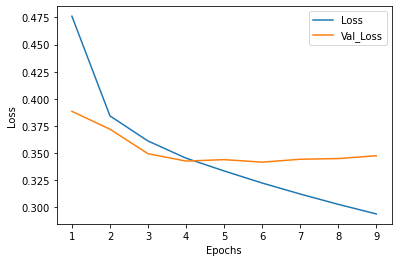

In [27]:
s = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['loss'], label='Loss')
sns.lineplot(x = range(1,1+s),y = history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### **Predictions**

Predicted Label : a
Actual Label:a


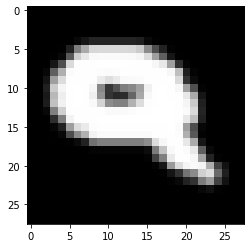

In [ ]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model1.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

Predicted Label : 8
Actual Label:8


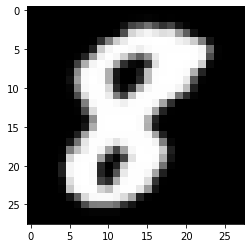

In [ ]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model1.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

Predicted Label : r
Actual Label:r


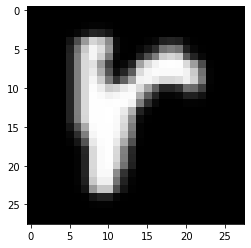

In [ ]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model1.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

Predicted Label : 0
Actual Label: 0
Choose :
1. 0
2. o
3. O
0
Your chosen ans is:O


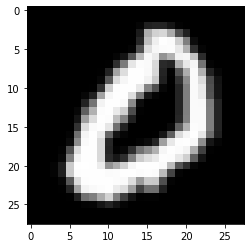

In [ ]:
plt.imshow(X_test[107596].reshape(28, 28),cmap='gray')
predictions = model1.predict(X_test[107596].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
index = y_test[107596].argmax()
print("Predicted Label : "+classes[index1])

print("Actual Label: "+ classes[index])
if classes[index] != classes[index1]:
  print("\n\tIt can be either 0 or O or o")
  

ans = int(input("Choose :\n1. 0\n2. o\n3. O\n"))

if(ans == 1):
  answer = "0"
elif(ans == 2):
  answer="o"
else:
  answer="O"

print("Your chosen ans is:"+answer)

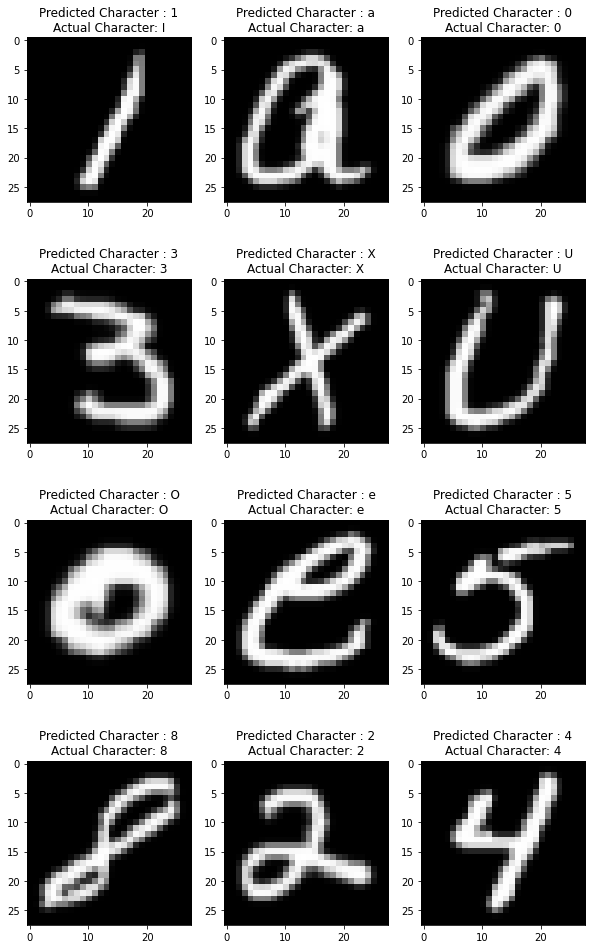

In [ ]:
fig = plt.figure(figsize=(10,17))
for i in range(12):
  plt.subplot(4 , 3 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')  # prints image
  predictions = model1.predict(X_test[i].reshape(1, 28, 28, 1))
  index1 =predictions.argmax()
  index2 = y_test[i].argmax()
  plt.title("Predicted Character : "+classes[index1]
            +"\n"+"Actual Character: "+ classes[index2])
  


**Reference Links**  
[Model created using the steps mentioned in summary and as shown in image.](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)     
[Tensorflow link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

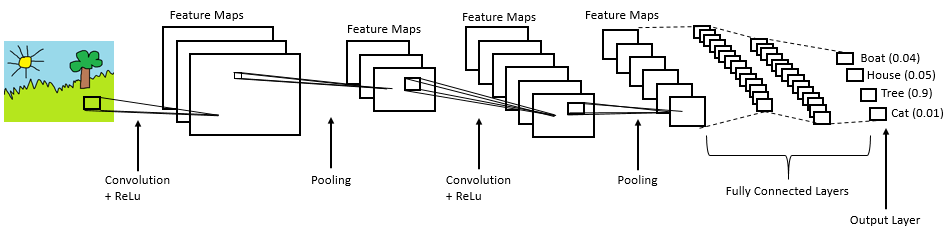

In [ ]:
from IPython.display import Image
Image('/content/Images/Image1.png')

## MODEL 4

In [ ]:
def my_model_4():  
# Input: 28x28 images with 1 channel -> (28, 28, 1)
  model = Sequential()
  
  # ----- Feature Extraction ----- ( Convolutional layers )

  # 1st Convolutional layer
  model.add(Conv2D(128, (3,3), input_shape = (28,28,1))) # adds 128 neurons with 3x3 window size/kernel size 
  model.add(BatchNormalization()) 
  model.add(Activation('relu'))         
  model.add(MaxPooling2D(pool_size=(2,2)))
 

  # ----- Classification -----  ( Fully Connected Layer )

  # 3rd layer(Output Layer)
  model.add(Flatten())  # Flattening the matrix into 1D array and feed it into a fully connected layer(Dense layer).
  model.add(Dense(62))
  model.add(BatchNormalization())     
  model.add(Activation('softmax'))
  #ouput layer has 62 neurons because there are 62 classes
  #softmax function is used for multi-class classification

  return model

In [ ]:
model4 = my_model_4()
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                1341246   
_________________________________________________________________
batch_normalization_5 (Batch (None, 62)               

In [ ]:
model4.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [ ]:
# Fit model on training data
history = model4.fit(X_train, y_train,
                  batch_size = 128,
                  epochs = 15,
                  validation_data=(X_test,y_test), 
                  #our model dosen't see this validation data...so it does not get trained on it...
                  #it's only used for tuning hyperparameters...
                  verbose=1,
             )

Train on 697932 samples, validate on 116323 samples
Epoch 1/15
697932/697932 [==============================] - 120s 171us/step - loss: 0.7785 - accuracy: 0.7984 - val_loss: 0.5411 - val_accuracy: 0.8327
Epoch 2/15
697932/697932 [==============================] - 119s 171us/step - loss: 0.5195 - accuracy: 0.8350 - val_loss: 0.5252 - val_accuracy: 0.8282
Epoch 3/15
697932/697932 [==============================] - 119s 171us/step - loss: 0.4632 - accuracy: 0.8463 - val_loss: 0.4686 - val_accuracy: 0.8416
Epoch 4/15
697932/697932 [==============================] - 119s 171us/step - loss: 0.4289 - accuracy: 0.8539 - val_loss: 0.4980 - val_accuracy: 0.8376
Epoch 5/15
697932/697932 [==============================] - 119s 171us/step - loss: 0.4055 - accuracy: 0.8597 - val_loss: 0.4594 - val_accuracy: 0.8436
Epoch 6/15
697932/697932 [==============================] - 119s 170us/step - loss: 0.3866 - accuracy: 0.8647 - val_loss: 0.4707 - val_accuracy: 0.8423
Epoch 7/15
697932/697932 [==========

In [ ]:
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print ('Test loss :', loss )
print ('Test accuracy :', accuracy )

Test loss : 0.49930176659585207
Test accuracy : 0.8391375541687012


In [ ]:
loss1, accuracy1 = model4.evaluate(X_train, y_train, verbose=0)
print ('Train loss :', loss1 )
print ('Train accuracy :', accuracy1 )

Train loss : 0.25704542300238986
Train accuracy : 0.9046998620033264


Text(0, 0.5, 'Accuracy')

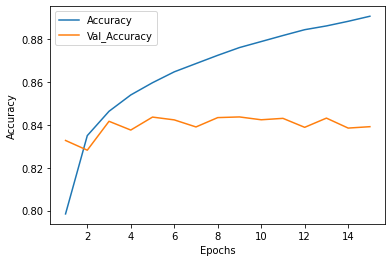

In [ ]:
import seaborn as sns
s = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+s),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

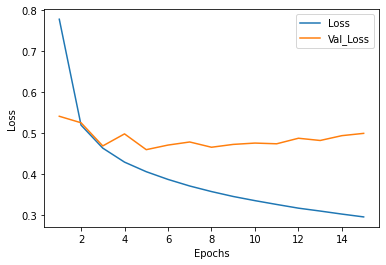

In [ ]:
s = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['loss'], label='Loss')
sns.lineplot(x = range(1,1+s),y = history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')